In [1]:
%matplotlib inline
%load_ext autoreload

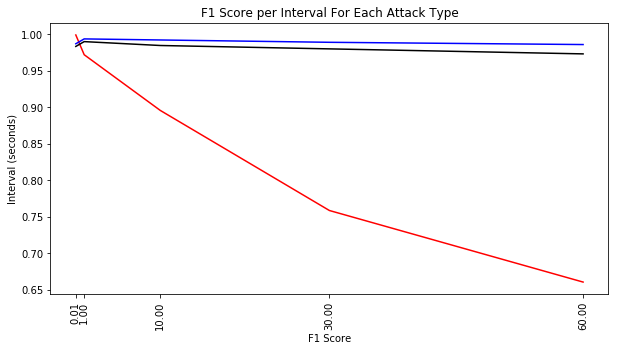

In [5]:
# Plotting the f1_score for each interval for DDOS attacks

from botnet_detection import get_plots_for_each_interval
from plot_features import plot_f1_per_interval
import matplotlib.pyplot as plt

# Get files containing each aggregated files.
intervals = [0.01, 1.0, 10.0, 30.0, 60.0]
attacks = ['ddos', 'spam', 'irc']
colors = ['red', 'blue', 'black']
plt.figure(figsize=(10, 5))
for i, attack in enumerate(attacks):
    
    files = ['minute_aggregated/{}-{}s.featureset.csv'.format(attack, interval) for interval in intervals]
    
    # Run each file through machine learning and get f1_scores of each
    f1_scores = get_plots_for_each_interval(attack, intervals)
    plt.plot(intervals, f1_scores, color=colors[i], label=attack)
plt.xticks(intervals, rotation=90)
plt.ylabel('Interval (seconds)')
plt.xlabel('F1 Score')
plt.title('F1 Score per Interval For Each Attack Type')
plt.show()
# Now plot these scores
# plot_f1_per_interval(f1_scores, 'f1 score per interval for DDOS', intervals)

# Comparing amount of Random Forest Estimators

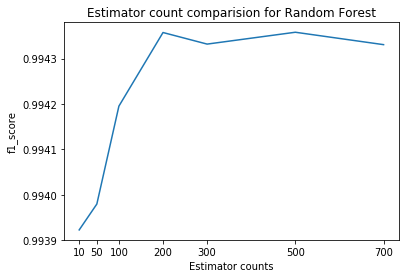

In [2]:
# For testing optimal amount of Random Forest estimators.
from botnet_detection import rf_compare_estimator_counts, get_specific_features_from
from plot_features import plot_rf_estimators
from summarizer import Summarizer
features = Summarizer().features
plot_rf_estimators(rf_compare_estimator_counts(*get_specific_features_from('minute_aggregated/spam-1s.featureset.csv', features)), 'Estimator count comparision for Random Forest')

**200** Seems the most optimal based on multiple runs

In [1]:
# Preparing things for the rest of the code here.

from botnet_detection import summary_of_detection, dl_test_dict, test_dict, dl_train, rf_train, dt_train, get_roc_metrics, get_specific_features_from
from utils import best_features
from plot_features import plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from summarizer import Summarizer
features = Summarizer().features
print(features)
attack_types = ['spam', 'irc']
files = ['minute_aggregated/{}-1s.featureset.csv'.format(attack) for attack in attack_types]
files += ['minute_aggregated/ddos-0.01s.featureset.csv']
# files += ['minute_aggregated/p2p-120.0s.featureset.csv']

Using TensorFlow backend.


['n_conn', 'avg_duration', 'n_udp', 'n_tcp', 'n_icmp', 'n_sports>1024', 'n_sports<1024', 'n_dports>1024', 'n_dports<1024', 'n_d_a_p_address', 'n_d_b_p_address', 'n_d_c_p_address', 'n_d_na_p_address', 'std_packets', 'std_bytes', 'std_time', 'std_srcbytes', 'src_to_dst', 'entropy_sports>1024', 'entropy_sports<1024', 'entropy_dports>1024', 'entropy_dports<1024', 'entropy_srcport', 'entropy_dstport', 'entropy_dstip', 'n_s_a_p_address', 'n_s_b_p_address', 'n_s_c_p_address', 'n_s_na_p_address', 'entropy_srcip', 'entropy_src_a_ip', 'entropy_src_b_ip', 'entropy_src_c_ip', 'entropy_src_na_ip', 'entropy_dst_a_ip', 'entropy_dst_b_ip', 'entropy_dst_c_ip', 'entropy_dst_na_ip', 'entropy_bytes', 'entropy_src_bytes', 'entropy_time', 'entropy_state', 'entropy_packets']


# Machine learning results for each attack (0.01s)

Results for minute_aggregated/spam-1s.featureset.csv
Accuracy: 0.9988, Recall: 0.9982, Precision: 0.9998, f1_score: 0.9990 



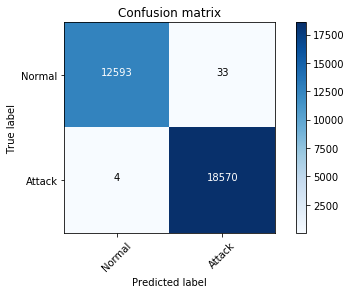

Results for minute_aggregated/irc-1s.featureset.csv
Accuracy: 0.9967, Recall: 0.9945, Precision: 0.9988, f1_score: 0.9966 



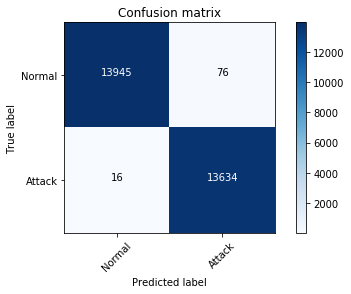

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.9997, Recall: 0.9999, Precision: 0.9997, f1_score: 0.9998 



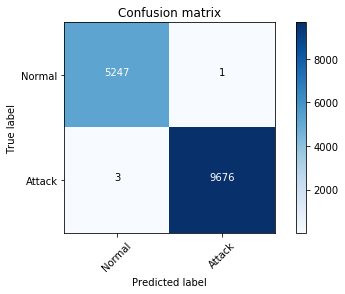

In [3]:
# Machine learning results for each attack type for 10 second intervals for random forest.

for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features)
    clf = rf_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

For Decision Trees

Results for minute_aggregated/spam-10s.featureset.csv
Accuracy: 0.99, Recall: 0.99, Precision: 0.99, f1_score: 0.99 



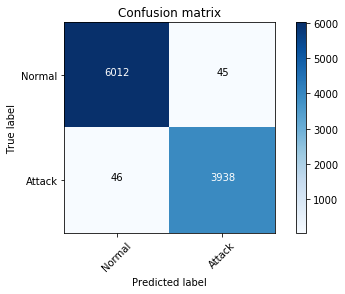

Results for minute_aggregated/irc-10s.featureset.csv
Accuracy: 0.98, Recall: 0.97, Precision: 0.98, f1_score: 0.97 



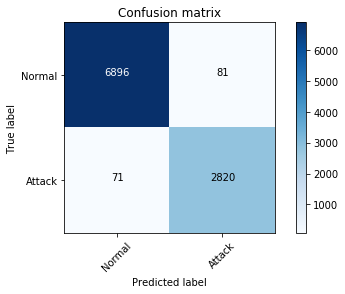

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 1.00, Recall: 1.00, Precision: 1.00, f1_score: 1.00 



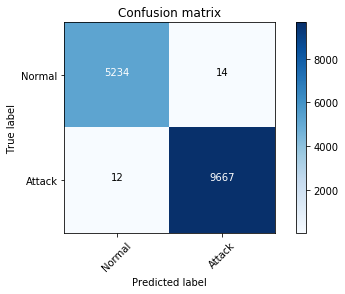

Results for minute_aggregated/p2p-120.0s.featureset.csv
Accuracy: 0.58, Recall: 1.00, Precision: 0.58, f1_score: 0.74 



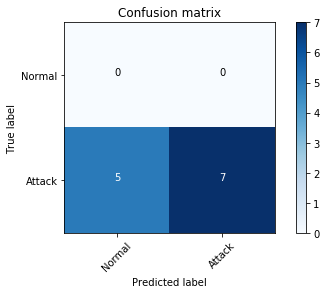

In [9]:
print('For Decision Trees\n')
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dt_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, f1_score: {f1_score:.2f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

For Deep Learning

Results for minute_aggregated/spam-1s.featureset.csv
Accuracy: 0.9487, Recall: 0.9660, Precision: 0.9471, f1_score: 0.9564 



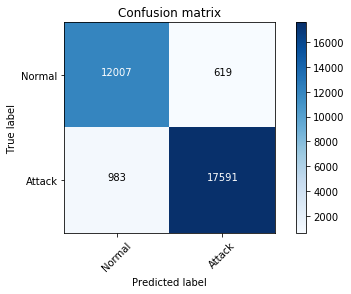

Results for minute_aggregated/irc-1s.featureset.csv
Accuracy: 0.9476, Recall: 0.9429, Precision: 0.9515, f1_score: 0.9472 



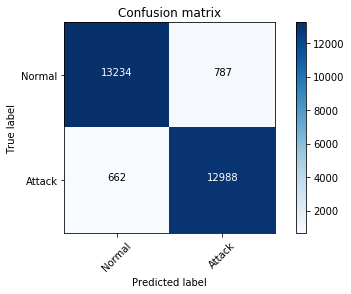

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.9705, Recall: 0.9771, Precision: 0.9774, f1_score: 0.9772 



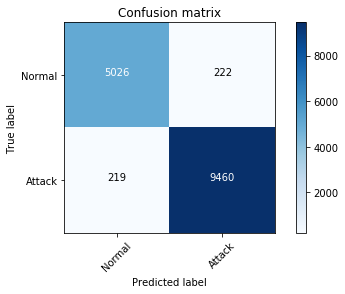

In [2]:
print('For Deep Learning\n')
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

# ROC curves for each attack and model

minute_aggregated/spam-1s.featureset.csv red


<IPython.core.display.Javascript object>


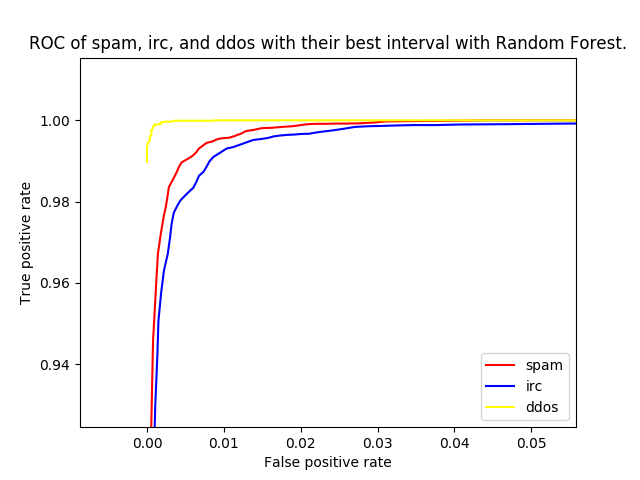

minute_aggregated/irc-1s.featureset.csv blue
minute_aggregated/ddos-0.01s.featureset.csv yellow


In [2]:
# ROC curves for Random Forest
%matplotlib notebook
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'yellow', 'black']
attacks = ['spam', 'irc', 'ddos', '']

for i, f in enumerate(files):
    print(f, colors[i])
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = rf_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest, f)
    plot_roc_curve(fpr, tpr, auc, '{} with random forest'.format(f), attacks[i], colors[i])

plt.title('ROC of spam, irc, and ddos with their best interval with Random Forest.')
plt.legend()
plt.show()

minute_aggregated/spam-1s.featureset.csv red
28800/31200 [==========================>...] - ETA: 0s

<IPython.core.display.Javascript object>


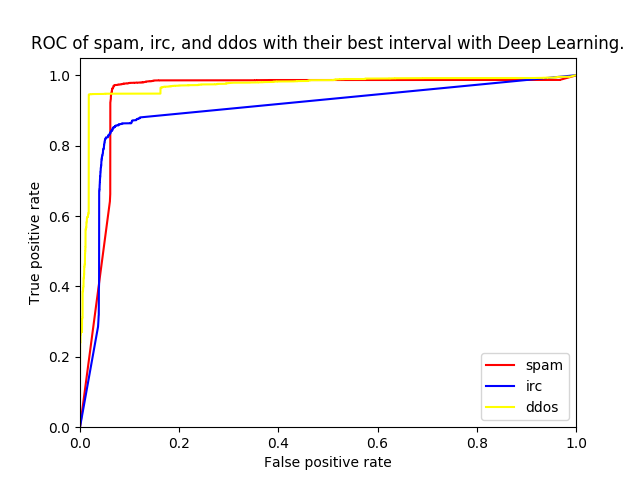

minute_aggregated/irc-1s.featureset.csv blue
12032/14927 [=======================>......] - ETA: 0s

In [5]:
# ROC curves for Random Forest
%matplotlib notebook
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'yellow', 'black']
attacks = ['spam', 'irc', 'ddos', '']

for i, f in enumerate(files):
    print(f, colors[i])
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dl_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest, sklearn=False)
    plot_roc_curve(fpr, tpr, auc, '{} with random forest'.format(f), attacks[i], colors[i])

plt.title('ROC of spam, irc, and ddos with their best interval with Deep Learning.')
plt.legend()
plt.show()

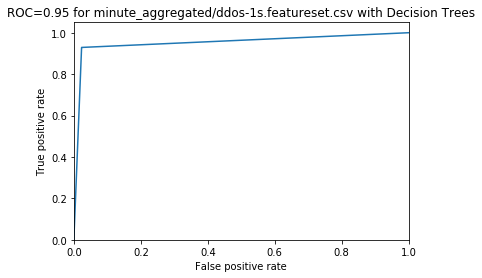

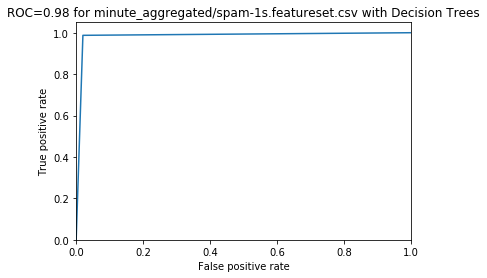

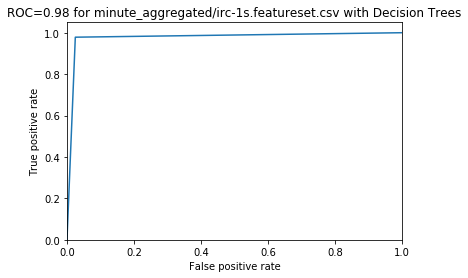

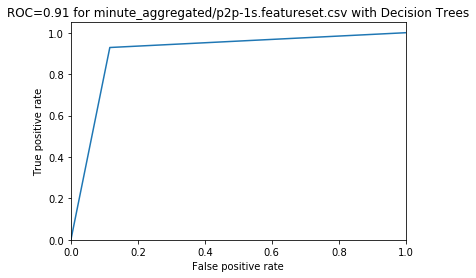

In [23]:
 # For decision trees

for f in files:
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dt_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest)
    plot_roc_curve(fpr, tpr, auc, '{} with Decision Trees'.format(f))

 32/988 [..............................] - ETA: 3s

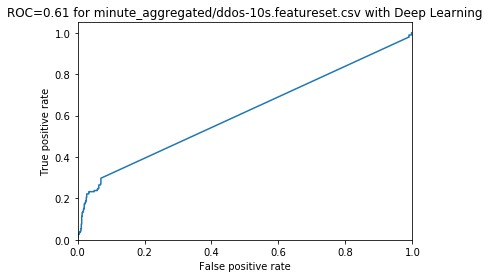

 9568/10041 [===========================>..] - ETA: 0s

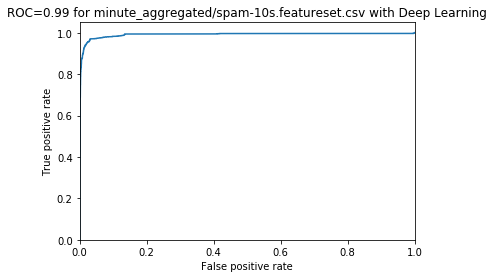

9344/9868 [===========================>..] - ETA: 0s

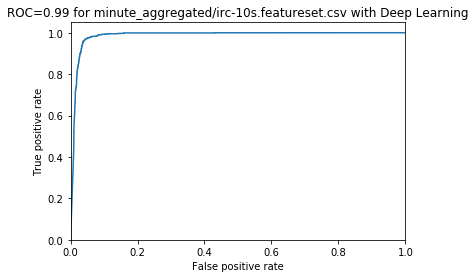

 32/132 [======>.......................] - ETA: 0s

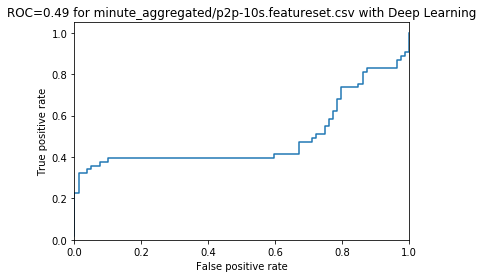

In [4]:
# For Deep Learning

for f in files:
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dl_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest, sklearn=False)
    plot_roc_curve(fpr, tpr, auc, '{} with Deep Learning'.format(f))

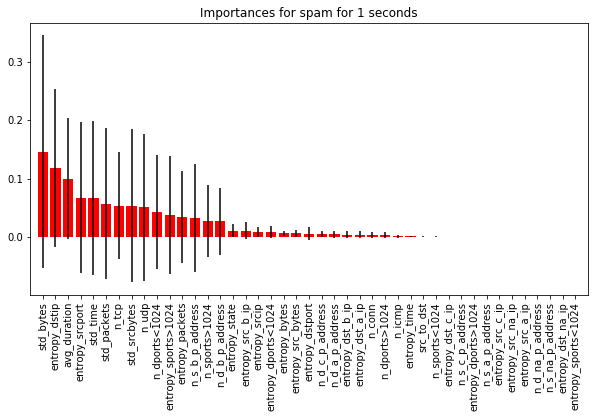

1 std_bytes
2 entropy_dstip
3 avg_duration
4 entropy_srcport
5 std_time
6 std_packets
7 n_tcp
8 std_srcbytes
9 n_udp
10 n_dports<1024
11 entropy_sports>1024
12 entropy_packets
13 n_s_b_p_address
14 n_sports>1024
15 n_d_b_p_address
16 entropy_state
17 entropy_src_b_ip
18 entropy_srcip
19 entropy_dports<1024
20 entropy_bytes
21 entropy_src_bytes
22 entropy_dstport
23 n_d_c_p_address
24 n_d_a_p_address
25 entropy_dst_b_ip
26 entropy_dst_a_ip
27 n_conn
28 n_dports>1024
29 n_icmp
30 entropy_time
31 src_to_dst
32 n_sports<1024
33 entropy_dst_c_ip
34 n_s_c_p_address
35 entropy_dports>1024
36 n_s_a_p_address
37 entropy_src_c_ip
38 entropy_src_na_ip
39 entropy_src_a_ip
40 n_d_na_p_address
41 n_s_na_p_address
42 entropy_dst_na_ip
43 entropy_sports<1024


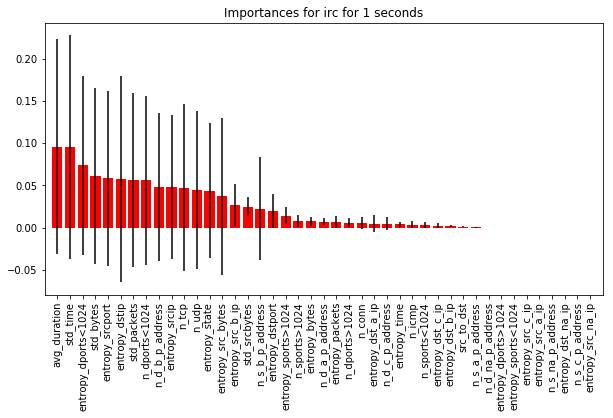

1 avg_duration
2 std_time
3 entropy_dports<1024
4 std_bytes
5 entropy_srcport
6 entropy_dstip
7 std_packets
8 n_dports<1024
9 n_d_b_p_address
10 entropy_srcip
11 n_tcp
12 n_udp
13 entropy_state
14 entropy_src_bytes
15 entropy_src_b_ip
16 std_srcbytes
17 n_s_b_p_address
18 entropy_dstport
19 entropy_sports>1024
20 n_sports>1024
21 entropy_bytes
22 n_d_a_p_address
23 entropy_packets
24 n_dports>1024
25 n_conn
26 entropy_dst_a_ip
27 n_d_c_p_address
28 entropy_time
29 n_icmp
30 n_sports<1024
31 entropy_dst_c_ip
32 entropy_dst_b_ip
33 src_to_dst
34 n_s_a_p_address
35 n_d_na_p_address
36 entropy_dports>1024
37 entropy_sports<1024
38 entropy_src_c_ip
39 entropy_src_a_ip
40 n_s_na_p_address
41 entropy_dst_na_ip
42 n_s_c_p_address
43 entropy_src_na_ip


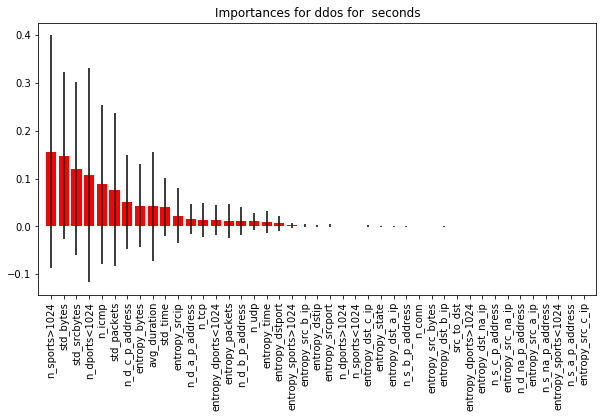

1 n_sports>1024
2 std_bytes
3 std_srcbytes
4 n_dports<1024
5 n_icmp
6 std_packets
7 n_d_c_p_address
8 entropy_bytes
9 avg_duration
10 std_time
11 entropy_srcip
12 n_d_a_p_address
13 n_tcp
14 entropy_dports<1024
15 entropy_packets
16 n_d_b_p_address
17 n_udp
18 entropy_time
19 entropy_dstport
20 entropy_sports>1024
21 entropy_src_b_ip
22 entropy_dstip
23 entropy_srcport
24 n_dports>1024
25 n_sports<1024
26 entropy_dst_c_ip
27 entropy_state
28 entropy_dst_a_ip
29 n_s_b_p_address
30 n_conn
31 entropy_src_bytes
32 entropy_dst_b_ip
33 src_to_dst
34 entropy_dports>1024
35 entropy_dst_na_ip
36 n_s_c_p_address
37 entropy_src_na_ip
38 n_d_na_p_address
39 entropy_src_a_ip
40 n_s_na_p_address
41 entropy_sports<1024
42 n_s_a_p_address
43 entropy_src_c_ip


In [11]:
from plot_features import best_features
from botnet_detection import get_specific_features_from, rf_train
from summarizer import Summarizer
import numpy as np

attacks = ['spam', 'irc', 'ddos']
files = [
    'minute_aggregated/spam-1s.featureset.csv',
    'minute_aggregated/irc-1s.featureset.csv',
    'minute_aggregated/ddos-0.01s.featureset.csv'
]

for f in files:
    features = Summarizer().features
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = rf_train(xtrain, ytrain)
    attack_interval = f.split('/')[-1].split('.')[0]
    attack = attack_interval.split('-')[0]
    interval = attack_interval.split('-')[1][:-1]
    indices = best_features(clf, np.array(xtrain), '{} for {} seconds'.format(attack, interval), features)
    for i, index in enumerate(indices):
        print(i+1, features[index])